时延关联检测测试

In [12]:
import numpy as np
import sys
import os

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), "../" * 2))
sys.path.insert(0, BASE_DIR)

from giefstat.statistical_tools.time_delayed_association import detect_time_delayed_assoc

载入测试用数据，数据中四个变量之间依次存在时延作用（一个变量与另一变量在一定时间后的变化关联，这段时间即为时延$\tau$）关系，进而导致时延关联：

In [13]:
from dataset.time_delayed.data_generator import gen_four_species

samples = gen_four_species(N=6000)

设置时延关联测试参数：

In [14]:
taus = np.arange(-20, 40, 2)
rounds = 100

首先，使用具有相邻作用的两个变量进行测试：

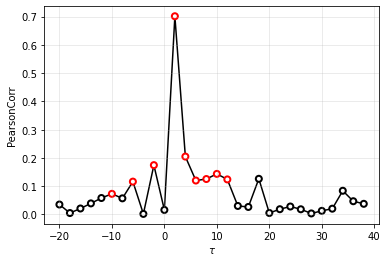

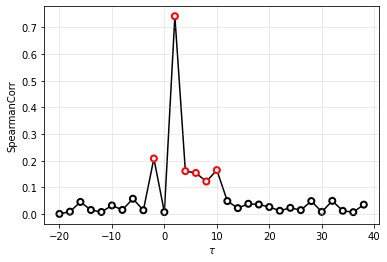

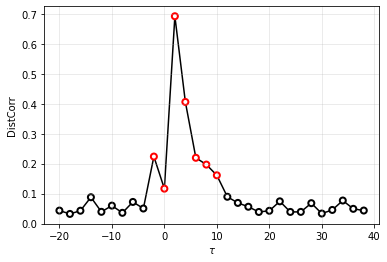

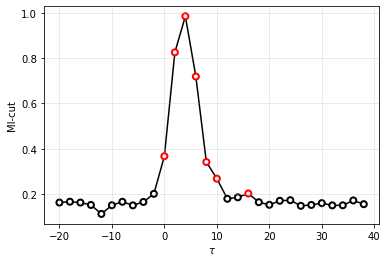

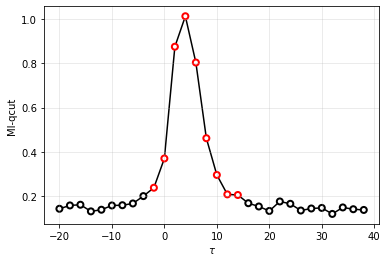

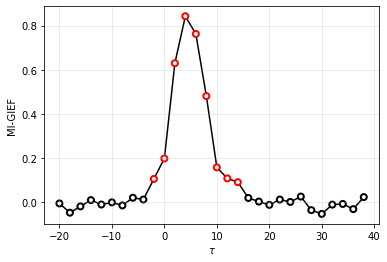

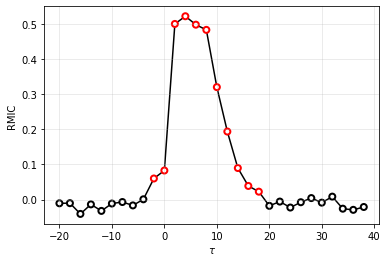

In [15]:
x, y = samples[:, 0], samples[:, 1]

_ = detect_time_delayed_assoc(x, y, taus, show=True, alpha=0.01, rounds=rounds, method="PearsonCorr")
_ = detect_time_delayed_assoc(x, y, taus, show=True, alpha=0.01, rounds=rounds, method="SpearmanCorr")
_ = detect_time_delayed_assoc(x, y, taus, show=True, alpha=0.01, rounds=rounds, method="DistCorr")
_ = detect_time_delayed_assoc(x, y, taus, show=True, alpha=0.01, rounds=rounds, method="MI-cut")
_ = detect_time_delayed_assoc(x, y, taus, show=True, alpha=0.01, rounds=rounds, method="MI-qcut")
_ = detect_time_delayed_assoc(x, y, taus, show=True, alpha=0.01, rounds=rounds, method="MI-GIEF")
_ = detect_time_delayed_assoc(x, y, taus, show=True, alpha=0.01, rounds=rounds, method="RMIC")

以上每张子图中，横轴为时延值$\tau$，纵轴为对应的相关和关联系数值；红色点表示基于代用数据检测出的显著时延关联，黑色点表示不具有显著关联即独立的结果。  
从以上检测结果可见，各系数均发现两个变量在正时延区间存在显著的关联峰，表明第一个变量对于第二个变量具有正时延作用。

接下来，使用相距较远的变量进行测试：

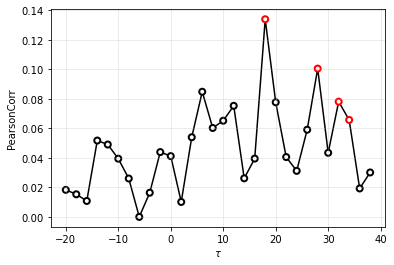

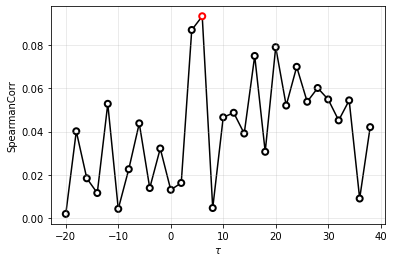

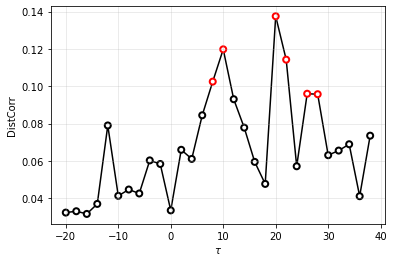

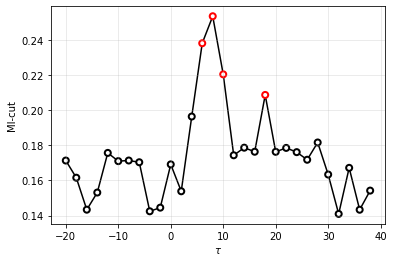

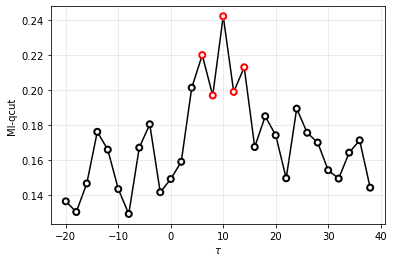

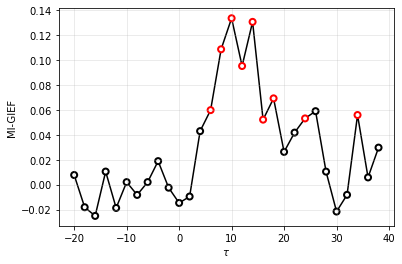

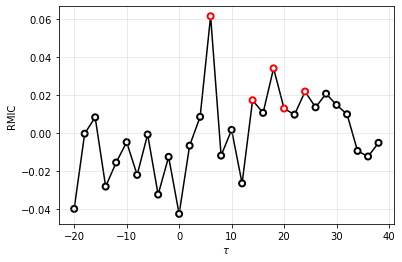

In [16]:
x, y = samples[:, 0], samples[:, 3]

_ = detect_time_delayed_assoc(x, y, taus, show=True, alpha=0.01, rounds=rounds, method="PearsonCorr")
_ = detect_time_delayed_assoc(x, y, taus, show=True, alpha=0.01, rounds=rounds, method="SpearmanCorr")
_ = detect_time_delayed_assoc(x, y, taus, show=True, alpha=0.01, rounds=rounds, method="DistCorr")
_ = detect_time_delayed_assoc(x, y, taus, show=True, alpha=0.01, rounds=rounds, method="MI-cut")
_ = detect_time_delayed_assoc(x, y, taus, show=True, alpha=0.01, rounds=rounds, method="MI-qcut")
_ = detect_time_delayed_assoc(x, y, taus, show=True, alpha=0.01, rounds=rounds, method="MI-GIEF")
_ = detect_time_delayed_assoc(x, y, taus, show=True, alpha=0.01, rounds=rounds, method="RMIC")

从各方法时延关联检测结果来看，只有MI-cut、MI-qcut和MI-GIEF取得了较好的效果，呈现出较为显著的时延峰。